<a href="https://colab.research.google.com/github/AustinD123/machine-learning-projects/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.4.0+cu121


In [ ]:
scalar=torch.tensor(7)
scalar

tensor(7)

In [ ]:
vector=torch.tensor([7,7])
vector
vector.ndim
vector.shape

torch.Size([2])

In [ ]:
TENSOR=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
TENSOR.shape

torch.Size([3, 3])

In [ ]:
TENSOR[:,0]

tensor([1, 4, 7])

In [ ]:
random=torch.rand(2,3,4)
random

tensor([[[0.3390, 0.6558, 0.0300, 0.0217],
         [0.7063, 0.5749, 0.5337, 0.7372],
         [0.1156, 0.1059, 0.6121, 0.2236]],

        [[0.5232, 0.0449, 0.5459, 0.9738],
         [0.3858, 0.0904, 0.3675, 0.5628],
         [0.6959, 0.7089, 0.9971, 0.2495]]])

In [ ]:
 one_to_ten=torch.arange(0,1000,77)
 one_to_ten

tensor([  0,  77, 154, 231, 308, 385, 462, 539, 616, 693, 770, 847, 924])

In [ ]:
t=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
t.sum(1).shape

torch.Size([3])

In [ ]:
T=t/t.sum(1,keepdim=True)
T


tensor([[0.1667, 0.3333, 0.5000],
        [0.2667, 0.3333, 0.4000],
        [0.2917, 0.3333, 0.3750]])

In [ ]:
t.view(-1,1).shape

torch.Size([9, 1])

In [ ]:
t=torch.rand(3,4)
ts=torch.stack((t,t))
ts

tensor([[[0.9920, 0.7651, 0.7852, 0.1428],
         [0.3550, 0.5154, 0.6481, 0.1856],
         [0.4581, 0.3395, 0.9785, 0.5788]],

        [[0.9920, 0.7651, 0.7852, 0.1428],
         [0.3550, 0.5154, 0.6481, 0.1856],
         [0.4581, 0.3395, 0.9785, 0.5788]]])

In [ ]:
tq=ts.view(1,2,3,4)
tq.shape


torch.Size([1, 2, 3, 4])

In [ ]:
tq.squeeze().shape

torch.Size([2, 3, 4])

In [ ]:
tp=torch.rand(3,4,5)
tp=tp.permute(1,2,0)
tp.shape

torch.Size([4, 5, 3])

In [ ]:
torch.cuda.is_available()

False

In [ ]:
X=torch.arange(0,100,0.02)
weights = 0.5
bias = 0.3
Y=X*weights+bias

In [ ]:
X,Y

(tensor([0.0000e+00, 2.0000e-02, 4.0000e-02,  ..., 9.9940e+01, 9.9960e+01,
         9.9980e+01]),
 tensor([ 0.3000,  0.3100,  0.3200,  ..., 50.2700, 50.2800, 50.2900]))

In [ ]:
X.float()

tensor([0.0000e+00, 2.0000e-02, 4.0000e-02,  ..., 9.9940e+01, 9.9960e+01,
        9.9980e+01])

In [ ]:
split_index = int(0.80 * len(X))

X_train = X[:split_index]
X_test = X[split_index:]
Y_train = Y[:split_index]
Y_test = Y[split_index:]


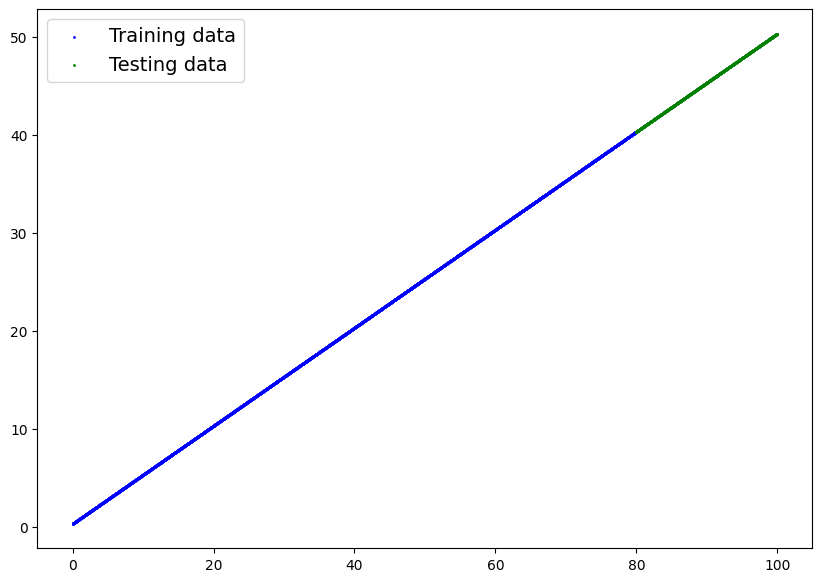

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=1, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=1, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=1, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions()

In [ ]:
from torch import nn

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.rand(1))
    self.bias=nn.Parameter(torch.rand(1))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias


In [ ]:
model=LinearRegressionModel()
loss=torch.nn.L1Loss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)

In [ ]:
epochs =1000
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  train_loss = loss(y_pred, Y_train)
  train_loss_values.append(train_loss)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss(test_pred, Y_test.type(torch.float))
    test_loss_values.append(test_loss)
  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")
print(model.state_dict())

Epoch: 0 | MAE Train Loss: 14.463027954101562 | MAE Test Loss: 32.13085174560547 
Epoch: 1000 | MAE Train Loss: 0.005851391702890396 | MAE Test Loss: 0.0027130318339914083 
Epoch: 2000 | MAE Train Loss: 0.0038392171263694763 | MAE Test Loss: 0.008414657786488533 
Epoch: 3000 | MAE Train Loss: 0.004038499668240547 | MAE Test Loss: 0.010603374801576138 
Epoch: 4000 | MAE Train Loss: 0.008806788362562656 | MAE Test Loss: 0.001864227349869907 
Epoch: 5000 | MAE Train Loss: 0.0037483510095626116 | MAE Test Loss: 0.008212379179894924 
Epoch: 6000 | MAE Train Loss: 0.0040227314457297325 | MAE Test Loss: 0.010557800531387329 
Epoch: 7000 | MAE Train Loss: 0.008864942006766796 | MAE Test Loss: 0.0020427817944437265 
Epoch: 8000 | MAE Train Loss: 0.0038863637018948793 | MAE Test Loss: 0.007885192520916462 
Epoch: 9000 | MAE Train Loss: 0.004246656317263842 | MAE Test Loss: 0.011059322394430637 
Epoch: 10000 | MAE Train Loss: 0.008963031694293022 | MAE Test Loss: 0.002269199350848794 
Epoch: 1100

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)
len(y_preds)

1000

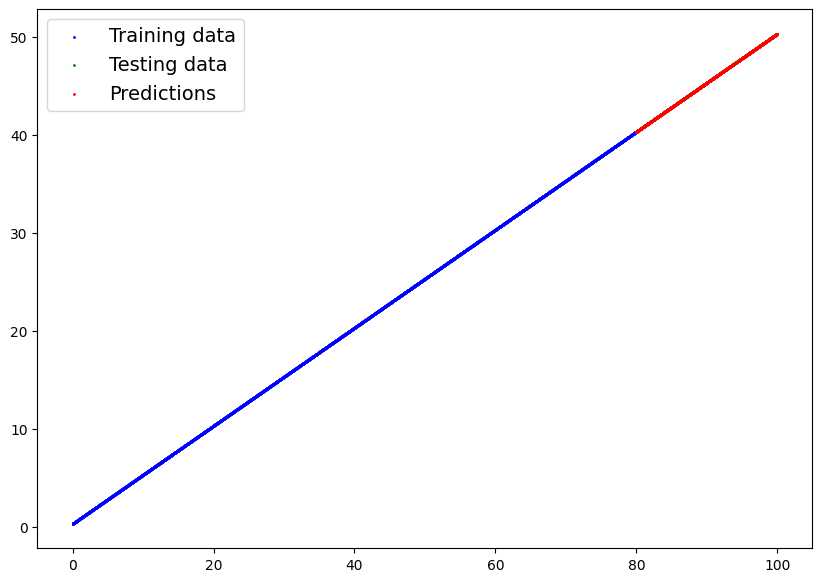

In [ ]:
plot_predictions(predictions=y_preds.detach())

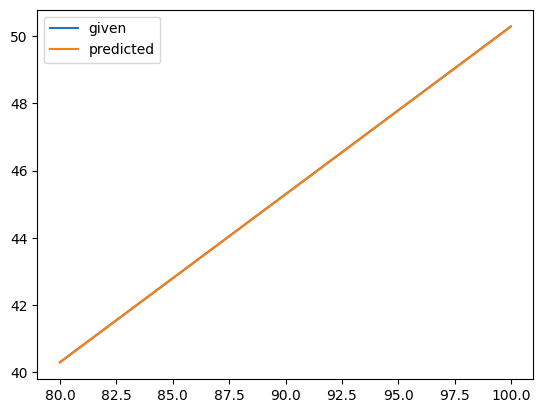

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_test,Y_test, label="given")
plt.plot(X_test,y_preds, label="predicted")
plt.legend()

In [ ]:
with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss(test_pred, Y_test.type(torch.float))
test_loss

tensor(0.0080)

##neural network


In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples=n_samples,noise=0.03,random_state=42)


In [ ]:
import pandas as pd
circles=pd.DataFrame({"x1":X[:,0],"x2":X[:,1],"label":y})
circles.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


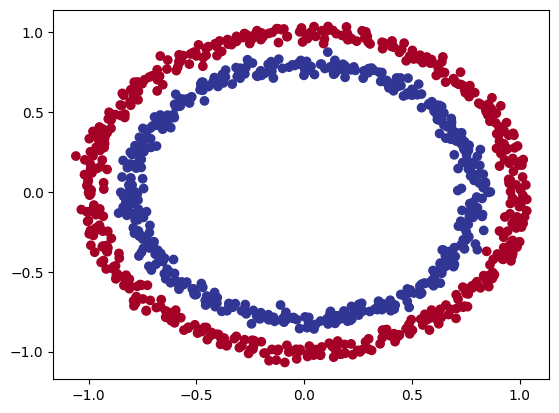

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu);


In [ ]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
torch.manual_seed(42)

In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))
model_0=CircleModel()

In [ ]:
next(model_0.parameters()).shape

torch.Size([5, 2])

In [ ]:
mode_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict(
)

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)*100
  return acc

In [ ]:
epochs=1000
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    if epoch%100==0:
      print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {accuracy_fn(y_true=y_test,y_pred=test_pred)}")

Epoch: 0 | Loss: 0.6956854462623596 | Accuracy: 50.0 | Test Loss: 0.7014647722244263 | Test Accuracy: 50.0
Epoch: 100 | Loss: 0.6929798126220703 | Accuracy: 51.125 | Test Loss: 0.6946582198143005 | Test Accuracy: 46.0
Epoch: 200 | Loss: 0.6929798722267151 | Accuracy: 51.0 | Test Loss: 0.6946795582771301 | Test Accuracy: 46.0
Epoch: 300 | Loss: 0.6929798126220703 | Accuracy: 51.0 | Test Loss: 0.6946795582771301 | Test Accuracy: 46.0
Epoch: 400 | Loss: 0.6929798126220703 | Accuracy: 51.0 | Test Loss: 0.6946795582771301 | Test Accuracy: 46.0
Epoch: 500 | Loss: 0.6929798126220703 | Accuracy: 51.0 | Test Loss: 0.6946795582771301 | Test Accuracy: 46.0
Epoch: 600 | Loss: 0.6929798126220703 | Accuracy: 51.0 | Test Loss: 0.6946795582771301 | Test Accuracy: 46.0
Epoch: 700 | Loss: 0.6929798126220703 | Accuracy: 51.0 | Test Loss: 0.6946795582771301 | Test Accuracy: 46.0
Epoch: 800 | Loss: 0.6929798126220703 | Accuracy: 51.0 | Test Loss: 0.6946795582771301 | Test Accuracy: 46.0
Epoch: 900 | Loss: 

In [ ]:
import requests
from pathlib import Path

In [ ]:

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

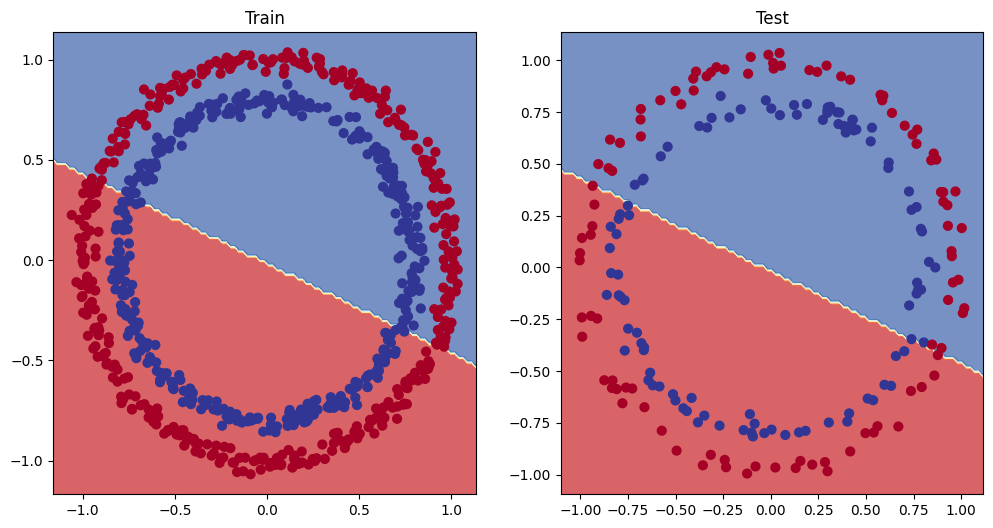

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
epochs=1000
for epoch in range(epochs):
  model_3.train()
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")

Epoch: 0 | Loss: 0.6973797082901001 | Accuracy: 50.0 | Test Loss: 0.6973850131034851 | Test Accuracy: 50.0
Epoch: 100 | Loss: 0.6928219795227051 | Accuracy: 49.125 | Test Loss: 0.6930912137031555 | Test Accuracy: 45.5
Epoch: 200 | Loss: 0.6918969750404358 | Accuracy: 53.37499999999999 | Test Loss: 0.6921961903572083 | Test Accuracy: 51.5
Epoch: 300 | Loss: 0.6907541751861572 | Accuracy: 56.99999999999999 | Test Loss: 0.6911329030990601 | Test Accuracy: 56.99999999999999
Epoch: 400 | Loss: 0.6894072890281677 | Accuracy: 59.12500000000001 | Test Loss: 0.6898359656333923 | Test Accuracy: 57.49999999999999
Epoch: 500 | Loss: 0.6874222755432129 | Accuracy: 62.375 | Test Loss: 0.6879920363426208 | Test Accuracy: 60.5
Epoch: 600 | Loss: 0.6843913793563843 | Accuracy: 68.875 | Test Loss: 0.6853593587875366 | Test Accuracy: 69.5
Epoch: 700 | Loss: 0.6796154975891113 | Accuracy: 76.25 | Test Loss: 0.6812626719474792 | Test Accuracy: 74.5
Epoch: 800 | Loss: 0.6715950965881348 | Accuracy: 82.625 |

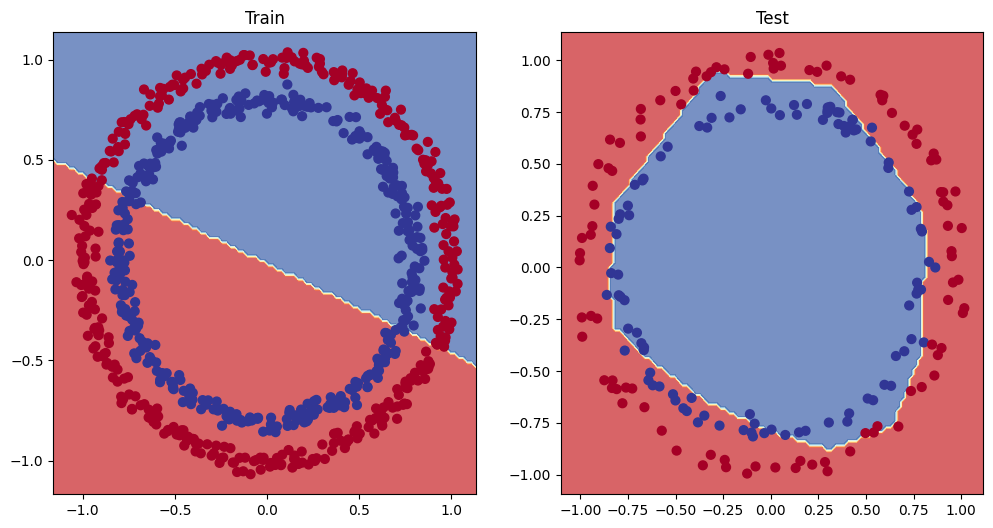

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

In [ ]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=10)
        self.layer_4 = nn.Linear(in_features=10, out_features=1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)  # Changed to Leaky ReLU

    def forward(self, x):
        # Use Leaky ReLU activation between layers
        return self.layer_4(self.leaky_relu(self.layer_3(self.leaky_relu(self.layer_2(self.leaky_relu(self.layer_1(x)))))))

model_3 = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.005)


In [ ]:
epochs = 10000
for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # Apply sigmoid here for binary classification
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))  # Apply sigmoid here too
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

Epoch: 0 | Loss: 0.6948 | Accuracy: 50.0000 | Test Loss: 0.6938 | Test Accuracy: 50.0000
Epoch: 100 | Loss: 0.6944 | Accuracy: 50.0000 | Test Loss: 0.6935 | Test Accuracy: 50.0000
Epoch: 200 | Loss: 0.6941 | Accuracy: 50.0000 | Test Loss: 0.6932 | Test Accuracy: 50.0000
Epoch: 300 | Loss: 0.6939 | Accuracy: 50.0000 | Test Loss: 0.6931 | Test Accuracy: 50.0000
Epoch: 400 | Loss: 0.6937 | Accuracy: 50.0000 | Test Loss: 0.6930 | Test Accuracy: 50.0000
Epoch: 500 | Loss: 0.6936 | Accuracy: 46.8750 | Test Loss: 0.6929 | Test Accuracy: 46.5000
Epoch: 600 | Loss: 0.6935 | Accuracy: 43.2500 | Test Loss: 0.6928 | Test Accuracy: 45.0000
Epoch: 700 | Loss: 0.6934 | Accuracy: 41.2500 | Test Loss: 0.6927 | Test Accuracy: 44.5000
Epoch: 800 | Loss: 0.6933 | Accuracy: 44.8750 | Test Loss: 0.6927 | Test Accuracy: 49.5000
Epoch: 900 | Loss: 0.6933 | Accuracy: 46.2500 | Test Loss: 0.6926 | Test Accuracy: 51.5000
Epoch: 1000 | Loss: 0.6933 | Accuracy: 47.5000 | Test Loss: 0.6926 | Test Accuracy: 51.5000


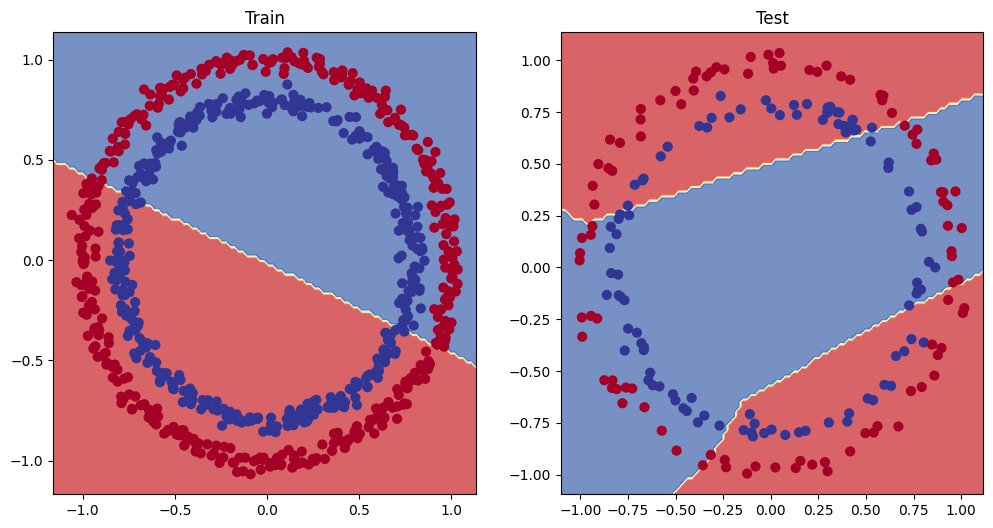

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

In [ ]:
from sklearn.datasets import make_blobs

NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

X_blob,y_blob=make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,random_state=RANDOM_SEED)

In [ ]:

X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)
X_blob_train=torch.from_numpy(X_blob_train).type(torch.float)
X_blob_test=torch.from_numpy(X_blob_test).type(torch.float)
y_blob_train=torch.from_numpy(y_blob_train).type(torch.float)
y_blob_test=torch.from_numpy(y_blob_test).type(torch.float)

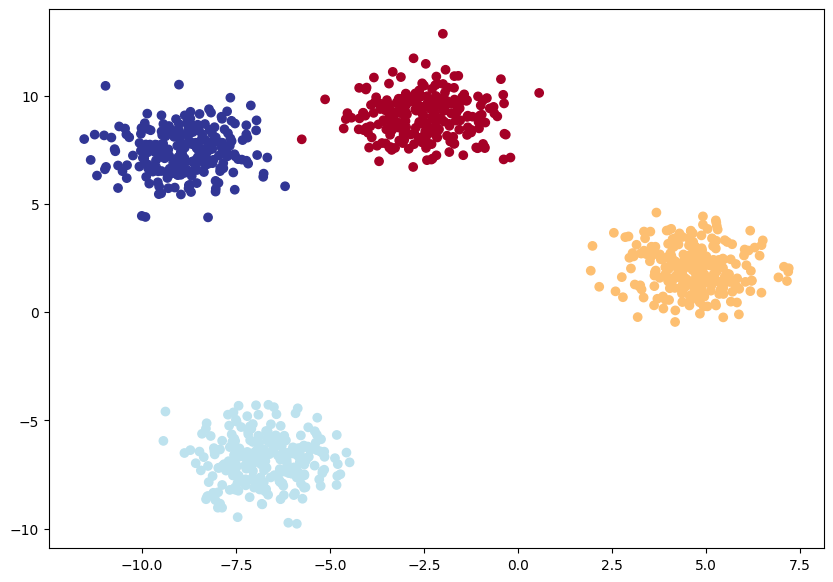

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
class blobmodel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)
model_4=blobmodel(input_features=2,output_features=4,hidden_units=8)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_4.parameters(),lr=0.01)
y_blob_train=y_blob_train.long()
y_blob_test=y_blob_test.long()

In [ ]:
epochs=1000
for epoch in range(epochs):
  model_4.train()
  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_blob_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_blob_test,test_pred)
    if epoch%100==0:
      print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")

Epoch: 0 | Loss: 1.2413042783737183 | Accuracy: 49.625 | Test Loss: 1.1770296096801758 | Test Accuracy: 48.5
Epoch: 100 | Loss: 0.0029261582531034946 | Accuracy: 99.875 | Test Loss: 0.0017622853629291058 | Test Accuracy: 100.0
Epoch: 200 | Loss: 0.002008485607802868 | Accuracy: 99.875 | Test Loss: 0.0010163441766053438 | Test Accuracy: 100.0
Epoch: 300 | Loss: 0.0016105695394799113 | Accuracy: 100.0 | Test Loss: 0.0007114660693332553 | Test Accuracy: 100.0
Epoch: 400 | Loss: 0.0013375948183238506 | Accuracy: 100.0 | Test Loss: 0.0004979193327017128 | Test Accuracy: 100.0
Epoch: 500 | Loss: 0.001110709854401648 | Accuracy: 100.0 | Test Loss: 0.00032772880513221025 | Test Accuracy: 100.0
Epoch: 600 | Loss: 0.0009021788137033582 | Accuracy: 100.0 | Test Loss: 0.00019773449457716197 | Test Accuracy: 100.0
Epoch: 700 | Loss: 0.0007087901467457414 | Accuracy: 100.0 | Test Loss: 0.00011073712084908038 | Test Accuracy: 100.0
Epoch: 800 | Loss: 0.0005374499596655369 | Accuracy: 100.0 | Test Los

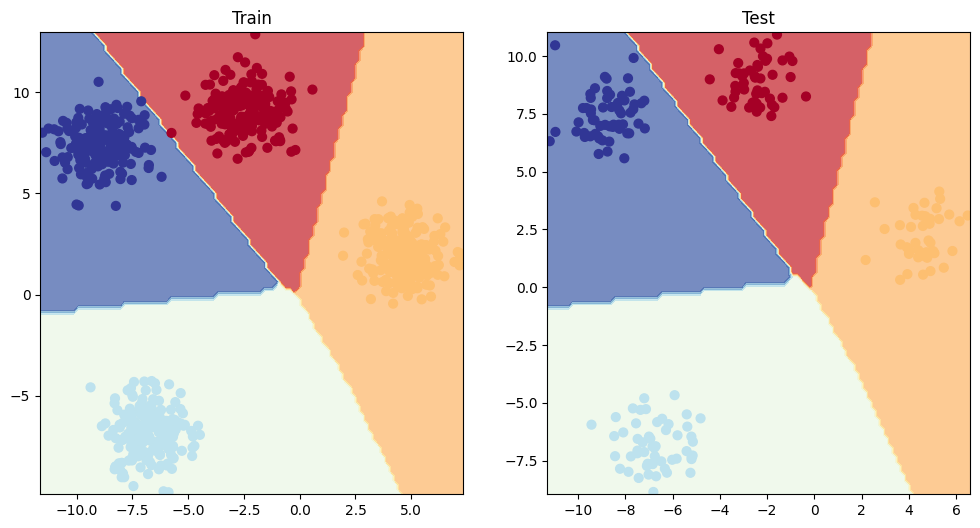

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)